# Import libraries

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter
import statsmodels.tsa.stattools as ts
import scipy.stats as stats
import statsmodels.stats.api as sms
import dataframe_image as dfi

In [3]:
%autosave 100

Autosaving every 100 seconds


In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# FX - Eventstudy

In [5]:
import eventstudy as es
print(es.__version__)
from eventstudy import excelExporter

import numpy as np
import matplotlib.pyplot as plt

0.1a12


CHF/USD:

In [6]:
es.Single.import_returns('/Users/dany/Documents/ZHAW/Master Banking and Finance/Semester 2/AQM/Arbeit/Eventstudy/CHF:USD/ReturnsCHF')

In [7]:
#event window and size by default
release_FOMC = es.Multiple.from_csv(
    path = '/Users/dany/Documents/ZHAW/Master Banking and Finance/Semester 2/AQM/Arbeit/Eventstudy/CHF:USD/FOMC ES_CHF.csv', # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (-5,+10),
    estimation_size = 200,
    buffer_size = 30,
    date_format = '%d/%m/%Y',
    ignore_errors = True
)

Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.


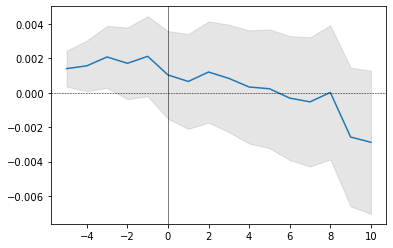

In [8]:
release_FOMC.plot(confidence=.95)
plt.show()

In [9]:
release_FOMC.results(decimals=[100,5,3,5,2,2])

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,0.001398,0.00063,0.001 **,0.00063,2.21,0.03
-4,0.000164,0.00063,0.002 *,0.00089,1.74,0.08
-3,0.000515,0.00063,0.002 *,0.00110,1.89,0.06
-2,-0.000370,0.00063,0.002,0.00127,1.35,0.18
-1,0.000408,0.00063,0.002,0.00142,1.49,0.14
0,-0.001085,0.00063,0.001,0.00155,0.66,0.51
1,-0.000378,0.00063,0.001,0.00167,0.39,0.70
2,0.000549,0.00063,0.001,0.00179,0.67,0.50
3,-0.000371,0.00063,0.001,0.00190,0.44,0.66
4,-0.000500,0.00063,0.0,0.00200,0.17,0.87


In [10]:
release_FOMC.get_CAR_dist(4)

,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,0.0014,0.0000,1.5564,0.3504,-0.0142,-0.0013,0.0010,0.0042,0.0159
-4,0.0016,0.0000,2.4578,0.8429,-0.0160,-0.0030,0.0009,0.0051,0.0308
-3,0.0021,0.0001,5.3204,1.4984,-0.0200,-0.0027,0.0010,0.0052,0.0443
-2,0.0017,0.0002,14.3531,2.4827,-0.0332,-0.0055,0.0010,0.0070,0.0905
-1,0.0021,0.0002,13.3764,2.2785,-0.0400,-0.0052,0.0004,0.0090,0.0969
0,0.0010,0.0002,2.2570,-0.2018,-0.0519,-0.0070,0.0008,0.0099,0.0523
1,0.0007,0.0003,2.5854,-0.3650,-0.0629,-0.0086,0.0020,0.0091,0.0503
2,0.0012,0.0003,2.0041,-0.1764,-0.0636,-0.0081,0.0026,0.0085,0.0523
3,0.0008,0.0003,2.3728,0.0691,-0.0644,-0.0082,0.0013,0.0091,0.0591
4,0.0003,0.0004,2.4603,0.0395,-0.0700,-0.0099,0.0015,0.0098,0.0719


In [11]:
#event_window -10, 20 und event_size erhöht um 200 auf 400
release_FOMC = es.Multiple.from_csv(
    path = '/Users/dany/Documents/ZHAW/Master Banking and Finance/Semester 2/AQM/Arbeit/Eventstudy/CHF:USD/FOMC ES_CHF.csv', # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (-10,+20),
    estimation_size = 400,
    buffer_size = 30,
    date_format = '%d/%m/%Y',
    ignore_errors = True
)

Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.


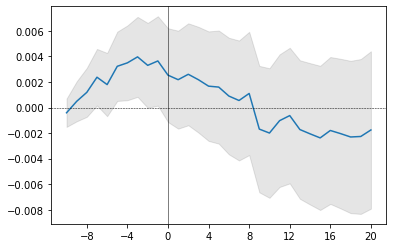

In [12]:
release_FOMC.plot(confidence=.95)
plt.show()

In [13]:
release_FOMC.results(decimals=[100,5,3,5,2,2])

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.000411,0.00067,-0.0,0.00067,-0.61,0.54
-9,0.000896,0.00067,0.0,0.00095,0.51,0.61
-8,0.000705,0.00067,0.001,0.00117,1.02,0.31
-7,0.001183,0.00067,0.002 *,0.00135,1.76,0.08
-6,-0.000577,0.00067,0.002,0.00150,1.19,0.23
-5,0.001432,0.00067,0.003 *,0.00165,1.96,0.05
-4,0.000271,0.00067,0.003 *,0.00178,1.97,0.05
-3,0.000468,0.00067,0.004 **,0.00190,2.08,0.04
-2,-0.000664,0.00067,0.003,0.00202,1.64,0.10
-1,0.000345,0.00067,0.004 *,0.00213,1.71,0.09


In [14]:
#event_window -15, 30 und event_size erhöht um 400 auf 600
release_FOMC = es.Multiple.from_csv(
    path = '/Users/dany/Documents/ZHAW/Master Banking and Finance/Semester 2/AQM/Arbeit/Eventstudy/CHF:USD/FOMC ES_CHF.csv', # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (-15,+30),
    estimation_size = 600,
    buffer_size = 30,
    date_format = '%d/%m/%Y',
    ignore_errors = True
)

Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.


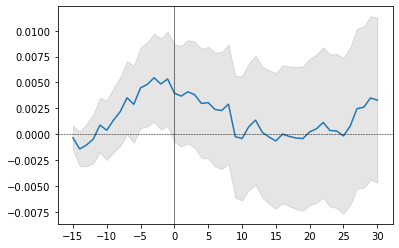

In [15]:
release_FOMC.plot(confidence=.95)
plt.show()

In [16]:
release_FOMC.results(decimals=[100,5,3,5,2,2])

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-15,-0.000347,0.00072,-0.0,0.00072,-0.48,0.63
-14,-0.001086,0.00072,-0.001,0.00101,-1.41,0.16
-13,0.000379,0.00072,-0.001,0.00124,-0.85,0.40
-12,0.000572,0.00072,-0.0,0.00143,-0.34,0.74
-11,0.001359,0.00072,0.001,0.00160,0.55,0.58
-10,-0.000505,0.00072,0.0,0.00175,0.21,0.83
-9,0.000984,0.00072,0.001,0.00189,0.72,0.47
-8,0.000825,0.00072,0.002,0.00202,1.08,0.28
-7,0.001335,0.00072,0.004,0.00215,1.64,0.10
-6,-0.000631,0.00072,0.003,0.00226,1.27,0.20


# Export in SQL Database - CHF/USD Results

In [17]:
import sqlite3
from sqlite3 import Error
 

""" create a database connection tool to a SQLite database """

def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

In [18]:
ES_CHF_AAR = release_FOMC.results(decimals=[100,5,3,5,2,2])

In [19]:
ES_CHF_AAR.to_csv('/Users/dany/Documents/ZHAW/Master Banking and Finance/Semester 2/AQM/Arbeit/SQLDataCHF')

In [20]:
records_to_insert = ES_CHF_AAR.values.tolist()
records_to_insert

[[-0.0003466155491545209, 0.00072, '-0.0', 0.00072, -0.48, 0.63],
 [-0.001085563577320796, 0.00072, '-0.001', 0.00101, -1.41, 0.16],
 [0.00037911894761579243, 0.00072, '-0.001', 0.00124, -0.85, 0.4],
 [0.0005723487395106981, 0.00072, '-0.0', 0.00143, -0.34, 0.74],
 [0.0013589571756798251, 0.00072, '0.001', 0.0016, 0.55, 0.58],
 [-0.0005050000966138262, 0.00072, '0.0', 0.00175, 0.21, 0.83],
 [0.0009836128642839131, 0.00072, '0.001', 0.00189, 0.72, 0.47],
 [0.0008251709403840985, 0.00072, '0.002', 0.00202, 1.08, 0.28],
 [0.001334587046205545, 0.00072, '0.004', 0.00215, 1.64, 0.1],
 [-0.0006310239523110607, 0.00072, '0.003', 0.00226, 1.27, 0.2],
 [0.0015913998787213477, 0.00072, '0.004 *', 0.00237, 1.89, 0.06],
 [0.00033321011543081965, 0.00072, '0.005 *', 0.00248, 1.94, 0.05],
 [0.0006438265372258077, 0.00072, '0.005 **', 0.00258, 2.11, 0.03],
 [-0.0006000607101814771, 0.00072, '0.005 *', 0.00268, 1.81, 0.07],
 [0.0004796076062798938, 0.00072, '0.005 *', 0.00277, 1.92, 0.05],
 [-0.001366

In [21]:
conn = sqlite3.connect('/Users/dany/Documents/ZHAW/Master Banking and Finance/Semester 2/AQM/Arbeit/ES_CHF.db')
c = conn.cursor()
c.execute('''CREATE TABLE EventstudyCHF
         (AAR INT NOT NULL,
         StdEAAR INT NOT NULL,
         CAAR INT NOT NULL,
         StdECAAR  NOT NULL,
         Tstat INT NOT NULL,
         Pvalue INT NOT NULL)''')

print("Table created successfully")

Table created successfully


In [22]:
c = conn.cursor()
c.executemany("INSERT INTO EventstudyCHF(AAR,StdEAAR,CAAR,StdECAAR,Tstat,Pvalue) VALUES (?,?,?,?,?,?)", records_to_insert)    
conn.commit()